In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import kpss

In [2]:
url = 'daily-total-female-births.csv'
#url = 'daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates = ['Date'], index_col = 'Date')

In [3]:
df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


<function matplotlib.pyplot.show(close=None, block=None)>

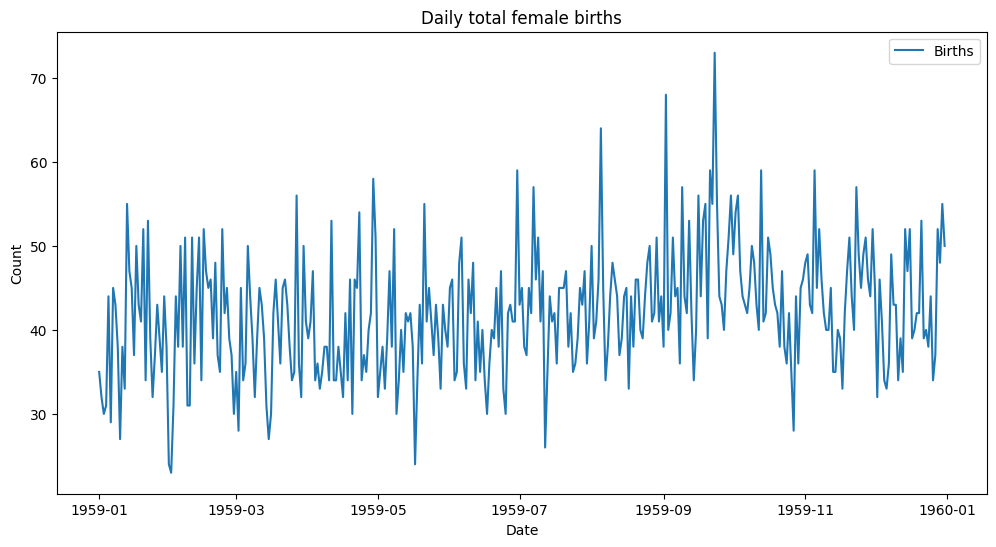

In [4]:
plt.figure(figsize = (12,6))
plt.title('Daily total female births')
sns.lineplot(df)
plt.xlabel('Date')
plt.ylabel('Count')
plt.show

In [5]:
def kpss_test(series):
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic:.4f}')
    print(f'p-value: {p_value:.4f}')
    print(f'Number of lags: {n_lags}')
    print('Critical Value')
    for key,value in critical_values.items():
        print(f'{key}:{value:.4f}')
    print(f'Result: The series is {"not" if p_value > 0.05 else ""} stationary')

kpss_test(df['Births'])

KPSS Statistic: 1.6130
p-value: 0.0100
Number of lags: 7
Critical Value
10%:0.3470
5%:0.4630
2.5%:0.5740
1%:0.7390
Result: The series is  stationary


C:\Users\Sailesh\AppData\Local\Temp\ipykernel_13840\1712197349.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series)


In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Births'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print(f'Result: The series is {"not" if result[1] < 0.05 else ""} stationary')

ADF Statistic: -4.808291253559763
p-value: 5.243412990149865e-05
Result: The series is not stationary


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Births'], model = 'additive', period = 182)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

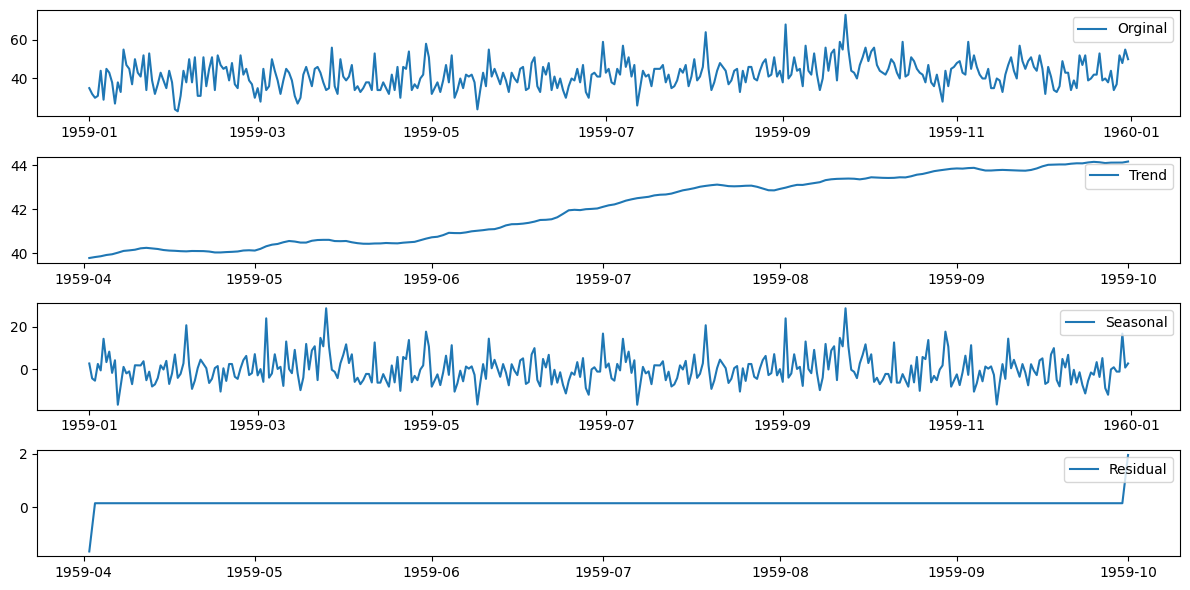

In [8]:
plt.figure(figsize = (12,6))
plt.subplot(411)
plt.plot(df['Births'],label = 'Orginal')
plt.legend(loc = 'upper right')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'upper right')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'upper right')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()